## Problem Statement

#### Dataset Description
This dataset contains records for university students, including demographic information, prior education, and academic performance during their first two semesters.

#### Target Variable Analysis
The target variable shows two outcomes: students who graduate and students who drop out. This makes the prediction task a binary classification problem.

#### Prediction Goal
The goal is to build a model that uses the available student features to predict if a student will or will not drop out.

Link: https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention/data


In [161]:
import pandas as pd
import numpy as np
df = pd.read_csv("dropout.csv")
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [162]:
df['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [163]:
df = df[df['Target'] != 'Enrolled']
df['Target'] = df['Target'].map({'Graduate': 0, 'Dropout': 1})

Removed the "Enrolled" category to make Target a binary for Logistic Regression

In [164]:
df['Target'].value_counts()

Target
0    2209
1    1421
Name: count, dtype: int64

In [165]:
cat_cols = [
    'Marital status',
    'Application order',
    'Application mode',
    'Course',
    'Daytime/evening attendance',
    'Previous qualification',
    'Nacionality',
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    'Displaced',
    'Educational special needs',
    'Debtor',
    'Tuition fees up to date',
    'Gender',
    'Scholarship holder',
    'International'
]
numeric_cols = df.drop(columns=cat_cols)
numeric_cols = numeric_cols.drop(columns=['Target'])

In [166]:
for c in cat_cols:
    print(df[c].unique())

[1 2 4 3 5 6]
[5 1 2 4 3 6 0]
[ 8  6  1 12  9 17 16 14 15  4 13  7  3  2  5 18 10 11]
[ 2 11  5 15  3 17 12 10 14 16  6  8  9  1  7  4 13]
[1 0]
[ 1 12 16  8 14  3 15  2  4  9 17 11  6  7 13  5 10]
[ 1 15  3 14 12 18  5 11 17  4  9 16 10 21  2  8  6  7 19]
[13  1 22 23  3 27  2 19  4 10 25  7  5 24  9 26 18 11 20 21  6  8 17 12
 28 14 16 15 29]
[10  3 27 28  1 14  4 24 29  2  5  9  7 26 18 30 12 15 25 31 16 11 20 33
 13 32  8  6 21 17 34 23 19 22]
[ 6  4 10  8  5  2 16  1  7  3 12  9 20 13 29 32 28 30 18 21 15 11 31 23
 19 22 26 25 24]
[10  4  8 11  6  5  9  2 22  7  1  3 12 39 13 29 46 43 30 44 41 23 45 28
 36 16 35 37 31 15 40 42 26 32 38 17 20 27 18 14 33 21]
[1 0]
[0 1]
[0 1]
[1 0]
[1 0]
[0 1]
[0 1]


In [167]:
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [168]:
df.duplicated().sum()

0

There were no missing values in the dataset. There were also no duplicate records. All categorical columns showed consistent numeric-coded values with no irregular entries. No cleaning is required.

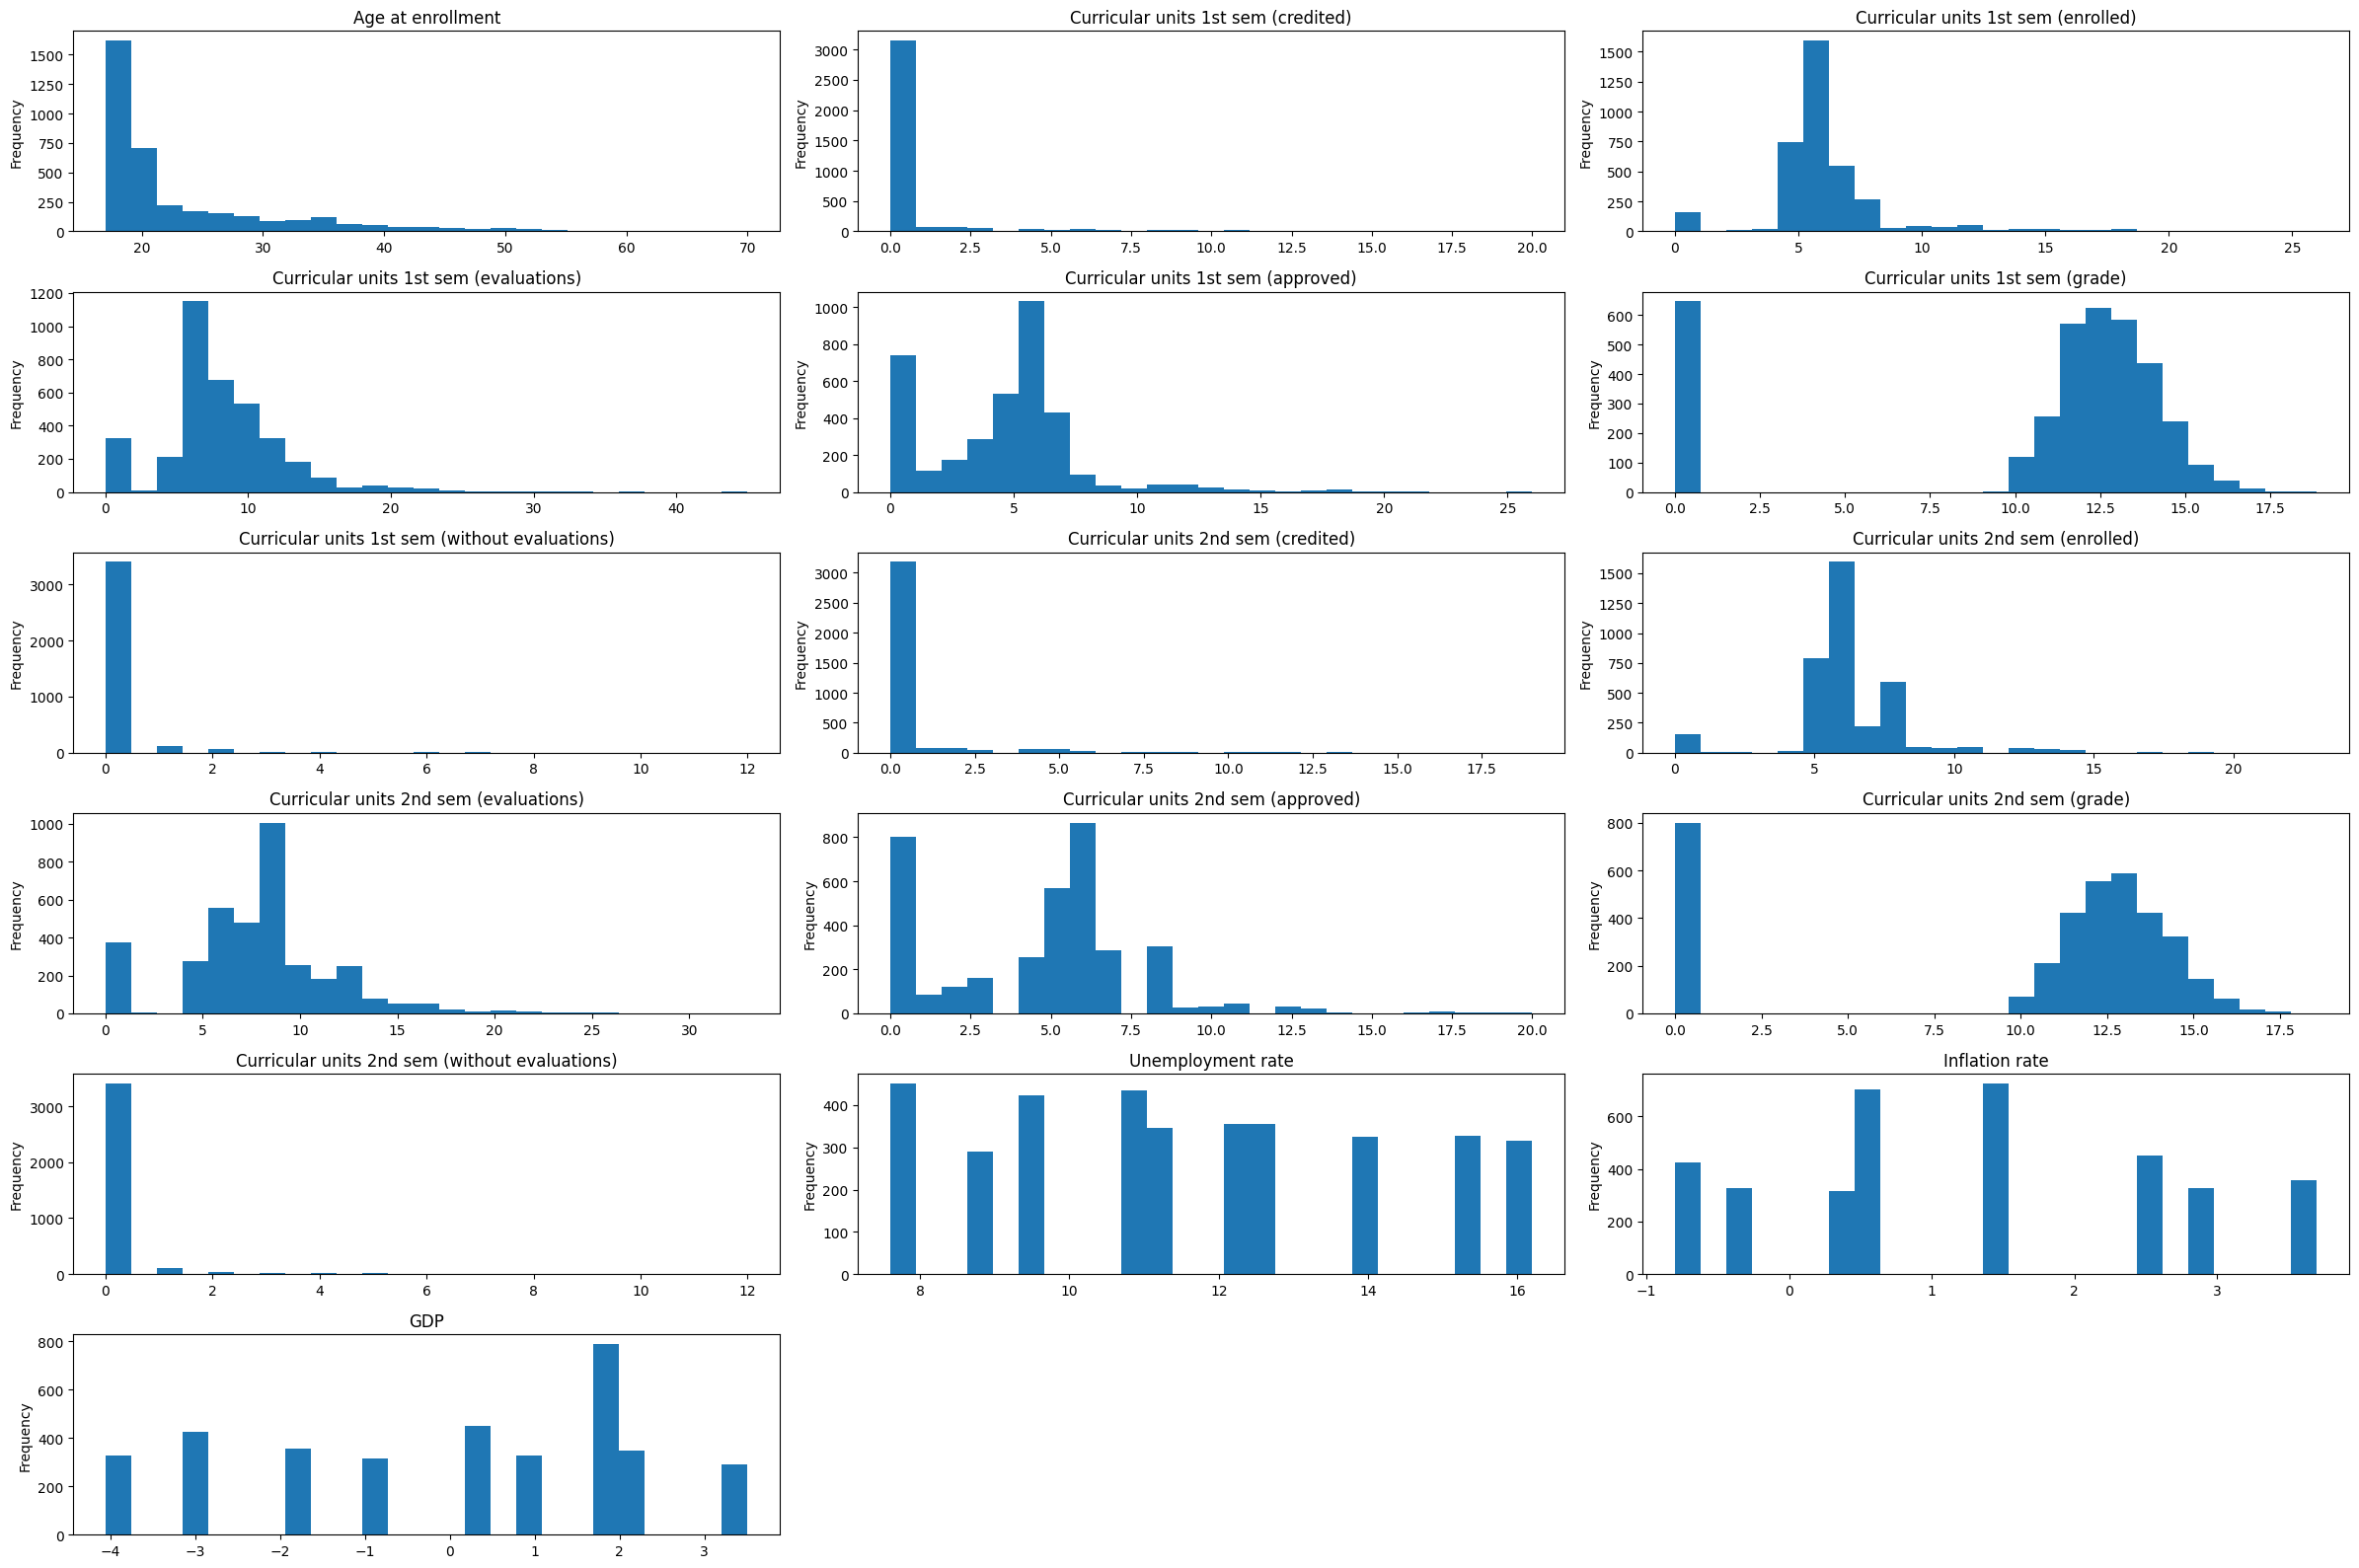

In [169]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(24,16))

i = 0
for column in numeric_cols:
    sub = fig.add_subplot(6,3,i+1)
    sub.set_title(column, fontsize=12)
    sub.set_xlabel("")  
    df[column].plot(kind='hist', bins=25)
    i += 1

plt.tight_layout()

In [170]:
remove = ['Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (without evaluations)', 'Curricular units 1st sem (credited)', 'Curricular units 2nd sem (credited)']
numeric_cols = numeric_cols.drop(columns=remove)
df = df.drop(columns=remove)

Dropped columns that were not going to change result

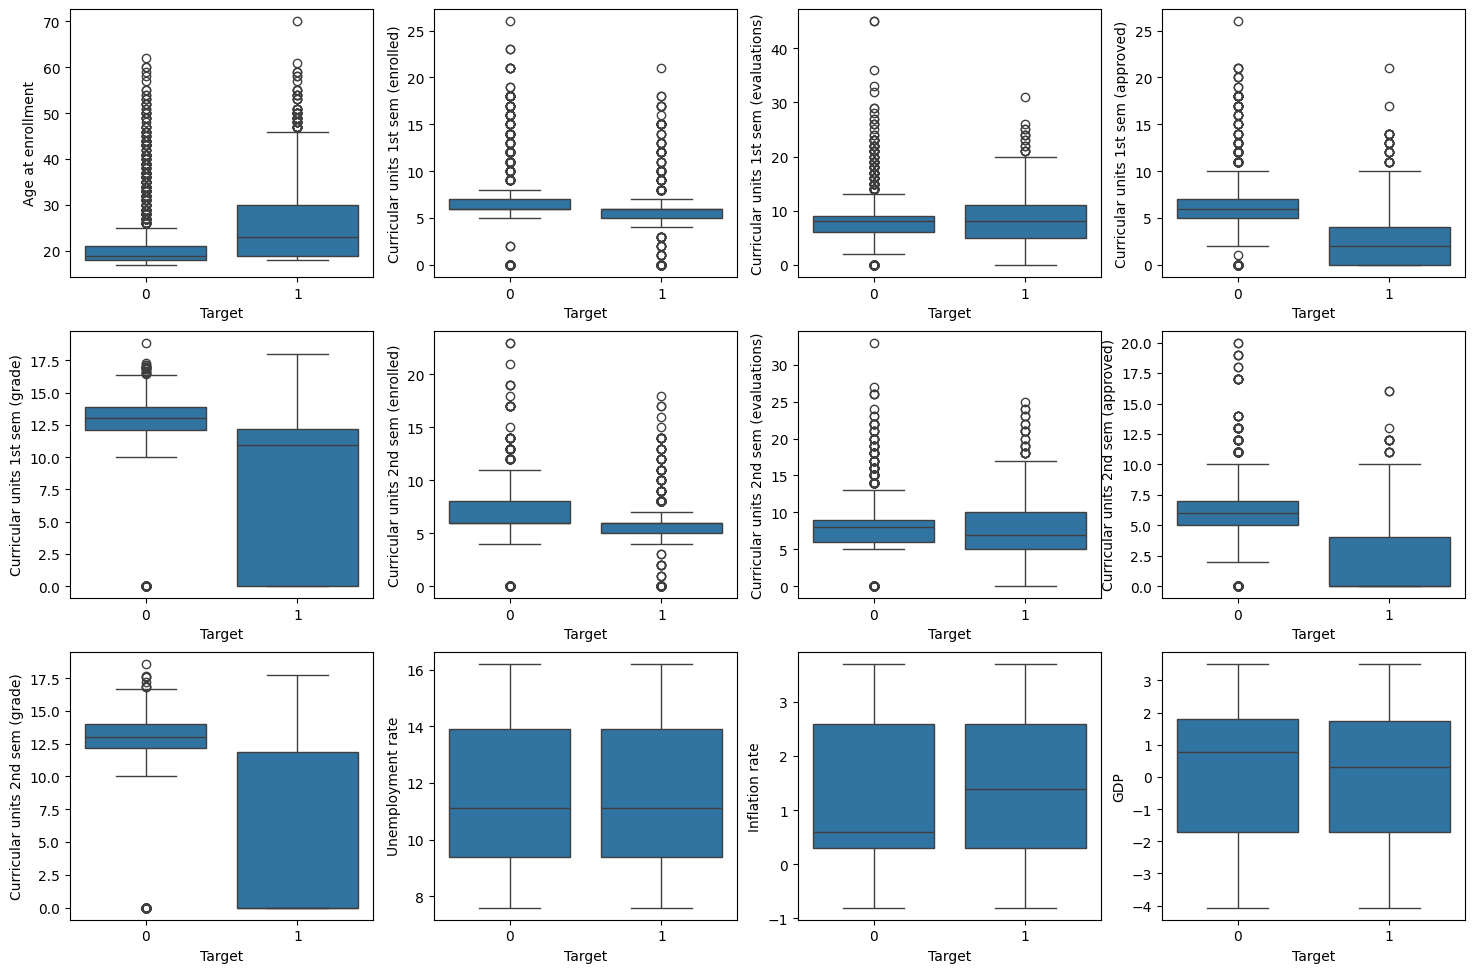

In [171]:
import seaborn as sns
num_list = numeric_cols.columns
fig= plt.figure(figsize=(18,16))

for i in range(len(num_list)):
    column=num_list[i]
    sub=fig.add_subplot(4,4,i+1)
    sns.boxplot(x='Target',y=column, data=df)


In [172]:
remove_bp = ['GDP','Unemployment rate', 'Inflation rate']
numeric_cols = numeric_cols.drop(columns=remove_bp)
df = df.drop(columns=remove_bp)

In [178]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
import numpy as np
X_num = numeric_cols
y = df["Target"]

fs_num = SelectKBest(score_func=f_classif, k='all')
fs_num.fit(X_num, y)

results = pd.DataFrame({
    'Feature': X_num.columns,
    'F_score': fs_num.scores_,
    'p_value': fs_num.pvalues_
}).sort_values('F_score', ascending=False)

print(results[results['p_value'] >= 0.05].to_string(index=False))

Empty DataFrame
Columns: [Feature, F_score, p_value]
Index: []


In [179]:

chi = SelectKBest(score_func=chi2, k='all')
catFeatures = chi.fit(df[cat_cols], y)

results = pd.DataFrame({
    'Feature': df[cat_cols].columns,
    'Chi2': chi.scores_,
    'p_value': chi.pvalues_
}).sort_values('Chi2', ascending=False)


print(results[results['p_value'] >= 0.05].to_string(index=False))

                   Feature     Chi2  p_value
Daytime/evening attendance 2.912942 0.087871
    Father's qualification 0.390080 0.532257
                    Course 0.319566 0.571869
 Educational special needs 0.188890 0.663842
             International 0.135409 0.712888
               Nacionality 0.123420 0.725354


In [180]:
drop_cols = ['Daytime/evening attendance', "Father's qualification", 'Course', 'Educational special needs', 'International', 'Nacionality']

c = df[cat_cols].copy()
c = c.drop(columns=drop_cols)
new_dummies = pd.get_dummies(c, columns=c.columns, drop_first=True, dtype=int)
df_dum = df.drop(columns=cat_cols)
df_dum = pd.concat([df_dum, new_dummies], axis=1)

In [181]:
df_dum.columns

Index(['Age at enrollment', 'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)', 'Target',
       ...
       'Father's occupation_42', 'Father's occupation_43',
       'Father's occupation_44', 'Father's occupation_45',
       'Father's occupation_46', 'Displaced_1', 'Debtor_1',
       'Tuition fees up to date_1', 'Gender_1', 'Scholarship holder_1'],
      dtype='object', length=156)

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score


x = df_dum.loc[:, df_dum.columns != 'Target']
y = df_dum['Target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, stratify=y)

In [108]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
oversampled_x, oversampled_y = os.fit_resample(x_train, y_train)

print(x_train.shape)
print(oversampled_x.shape)

(2541, 155)
(3092, 155)


In [112]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

LogRegression = LogisticRegression(max_iter=2000)
LogRegression.fit(oversampled_x, oversampled_y.values.ravel())

test_pred = LogRegression.predict(x_test)
accuracy_score(y_test, test_pred)

print("Precision:", precision_score(y_test, test_pred))
print("Recall:", recall_score(y_test, test_pred))
print("F1:", f1_score(y_test, test_pred))
print("ROC-AUC:", roc_auc_score(y_test, LogRegression.predict_proba(x_test)[:,1]))


Precision: 0.9116161616161617
Recall: 0.8474178403755869
F1: 0.878345498783455
ROC-AUC: 0.9495358273320162


The model works well. It can correctly identify most students who drop out and usually predicts dropouts accurately when it says someone will drop out. The precision, recall, F1, and ROC-AUC scores are all high, which means the model is making good predictions and separating the two classes clearly.

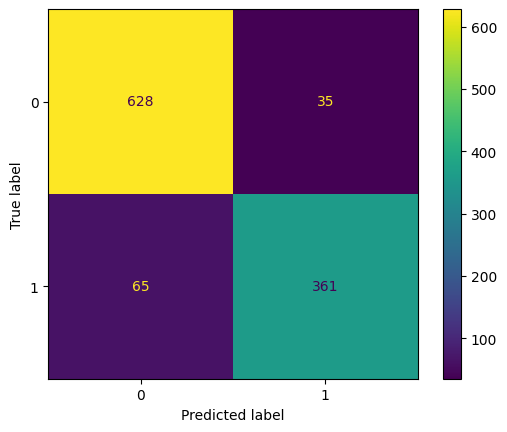

In [110]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(LogRegression, x_test, y_test)